# Tugas Manajemen Industri - Forecasting

Muhammad Ismail Azmi
21/473264/TK/52149

## Time Series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data
data = pd.read_csv('TSLA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
# 1. Simple Moving Average (SMA)
window = 7
data['SMA_Open'] = data['Open'].rolling(window=window).mean()
data['SMA_High'] = data['High'].rolling(window=window).mean()
data['SMA_Low'] = data['Low'].rolling(window=window).mean()

In [5]:
# Predict Close Price using SMA
data['Close_Predict_SMA'] = (data['SMA_Open'] + data['SMA_High'] + data['SMA_Low']) / 3

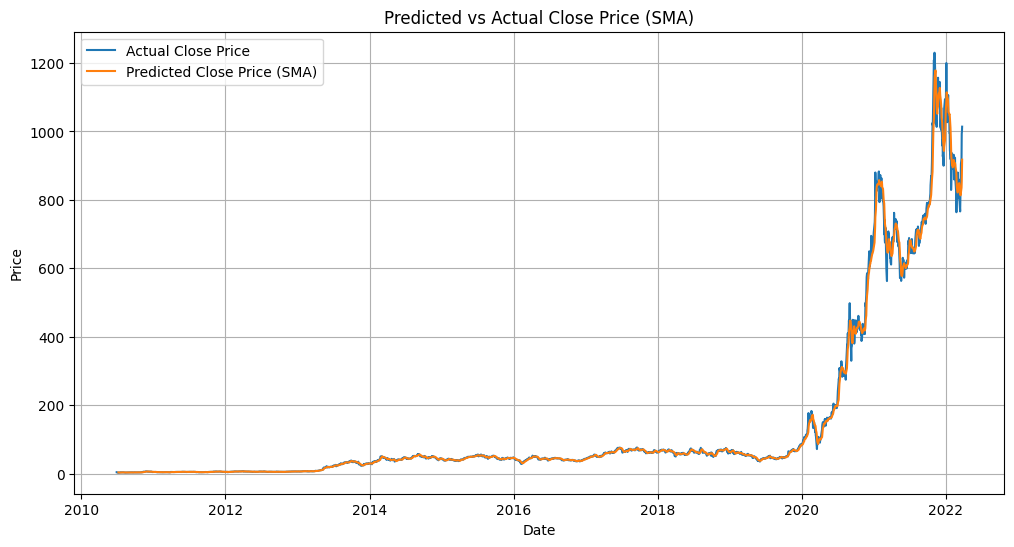

In [6]:
# Plot SMA Predicted vs Actual Close Prices
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(data.index, data['Close_Predict_SMA'], label='Predicted Close Price (SMA)')
plt.title('Predicted vs Actual Close Price (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# 2. ARIMA Forecasting (Based on SMA)
# Calculate SMA for Close Price
data['SMA_Close'] = data['Close'].rolling(window=window).mean()

In [9]:
# Fit ARIMA model
model = ARIMA(data['SMA_Close'].dropna(), order=(5,2,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Forecast Close Prices for the next 30 days
forecast_1_month = model_fit.forecast(steps=30)
future_dates_1_month = pd.date_range(start=data.index[-1], periods=31)[1:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


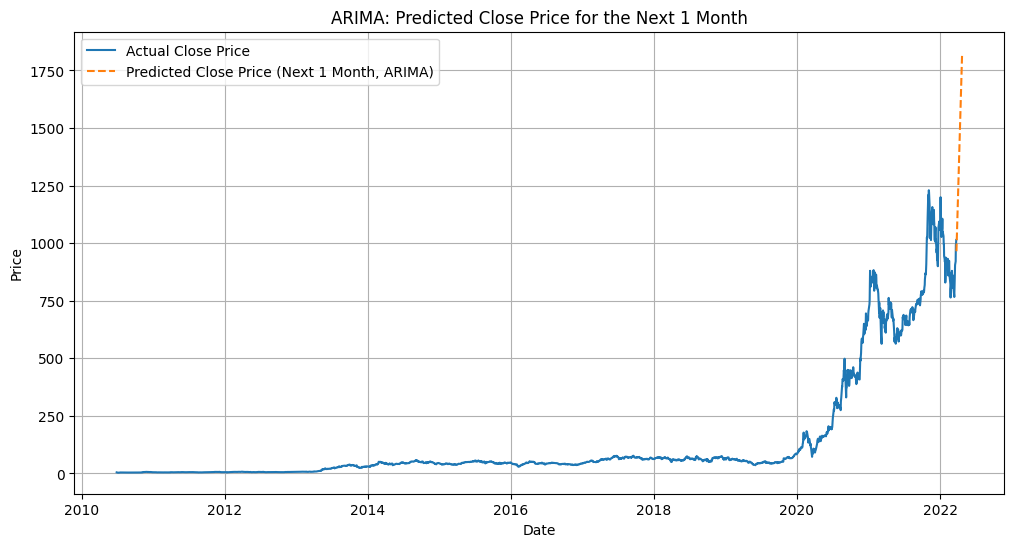

In [11]:
# Plot ARIMA predicted vs actual
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close Price')
plt.plot(future_dates_1_month, forecast_1_month, label='Predicted Close Price (Next 1 Month, ARIMA)', linestyle='--')
plt.title('ARIMA: Predicted Close Price for the Next 1 Month')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

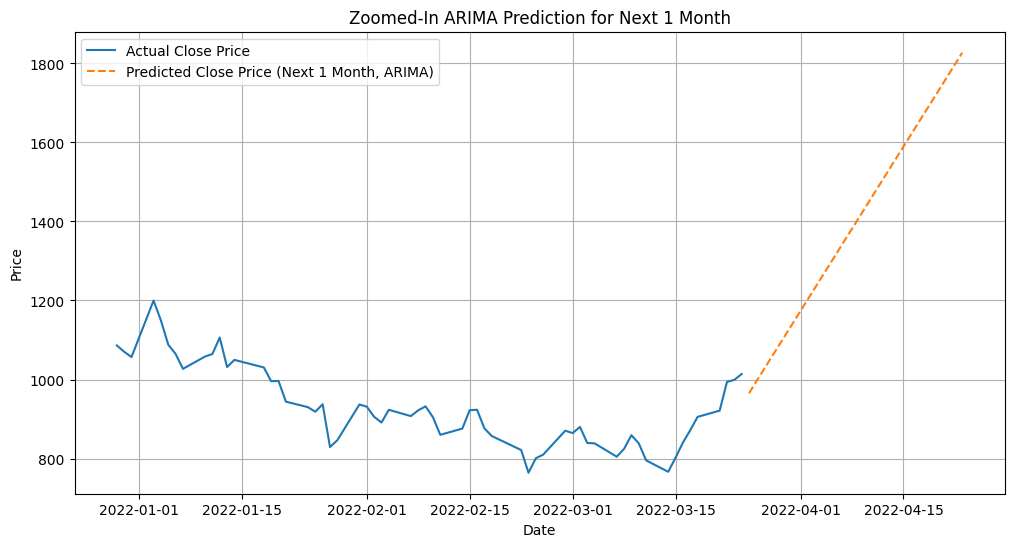

In [14]:
# Zoomed-in plot for ARIMA prediction
plt.figure(figsize=(12, 6))
plt.plot(data.index[-60:], data['Close'].tail(60), label='Actual Close Price')  # Plot the last 60 days
plt.plot(future_dates_1_month, forecast_1_month, label='Predicted Close Price (Next 1 Month, ARIMA)', linestyle='--')
plt.title('Zoomed-In ARIMA Prediction for Next 1 Month')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Causal

In [16]:
# 3. Linear Regression for Causal Forecasting
# Split data into features and target
X = data[['Open', 'High', 'Low']].dropna()  # Features
y = data['Close'].dropna()  # Target

In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict close prices
close_predict = linear_model.predict(X_test)

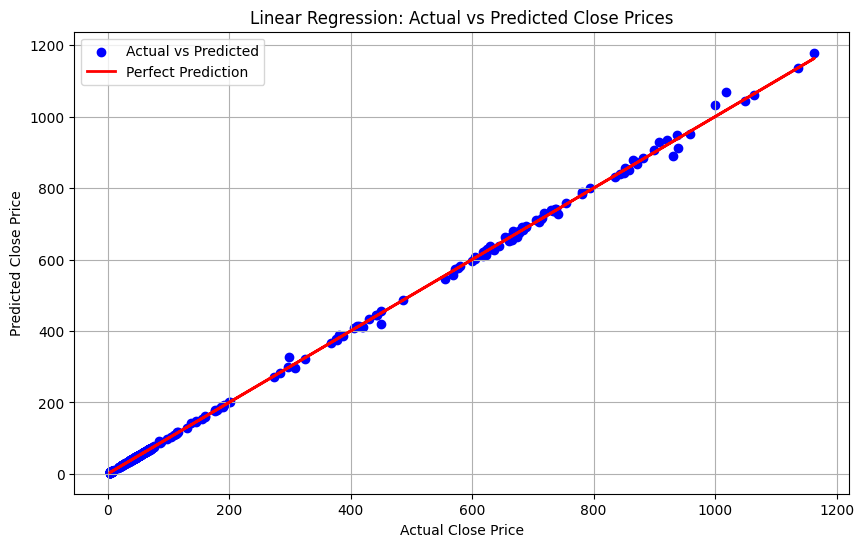

In [20]:
# Plot actual vs predicted (Linear Regression)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, close_predict, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted Close Prices')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Function to predict new close price based on new data
def predict_close(open_price, high_price, low_price):
    new_data_point = [[open_price, high_price, low_price]]
    close_predict = linear_model.predict(new_data_point)
    return close_predict[0]

In [22]:
# Example prediction
open_price = 100
high_price = 105
low_price = 95

In [23]:
predicted_close = predict_close(open_price, high_price, low_price)
print(f"Predicted Close Price: {predicted_close}")

Predicted Close Price: 100.5876518838177


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
